<a href="https://colab.research.google.com/github/al34n1x/CSA_LATAM2018/blob/master/9.BigData/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Spark](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=v46kRpi27oRc)

>>[Instalación en Colab](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=JIGw62oM7ypl)

>>[Variables de entorno](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=Pld58Eng79T6)

>>[Iniciar sesión de Spark](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=u6IA7l5A8Y5v)

>>[Carga de archivos](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=IyyTuVe38h1W)

>>[Almacenar archivo en formato Parquet](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=2nLwFkPD8w30)

>>[Spark SQL](#updateTitle=true&folderId=1hYY6URNFLa2w5I3uQbpDlwOox_am-5cM&scrollTo=PSRPJafR8_85)



# Spark


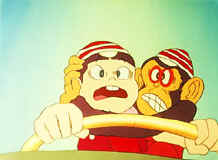




Apache Spark es un motor unificado diseñado para el procesamiento de datos distribuidos a gran escala, en centros de datos o en la nube.
La filosofía de diseño de Spark se centra en cuatro características clave:
* Velocidad
* Facilidad de uso
* Modularidad
* Extensibilidad


## Instalación en Colab

Primero instalamos los paquetes necesarios

* OpenJDK
* Spark con Hadoop
* findspark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

## Variables de entorno

Al ser un sandbox, debemos de configurar variables de entorno que serán utilizadas por Spark.
A continuación detallamos las dos variables de entornos requeridas, una para **JAVA** y otra para **SPARK**.


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

## Iniciar sesión de Spark

Una vez instalado los paquetes y configurado las variabls de entorno, podemos pasar a iniciar con el uso de Spark.
Las siguientes lineas nos permitirán iniciar la sesión de spark.

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

## Carga de archivos

Como lo hemos comentado, Spark se nutre de diferentes fuentes de datos, en nuestro caso, para el alcance del ejemplo, tomaremos uno de los archivos **CSV** dispuestos en COLAB para luego poder ser almacenado en Hadoop.

In [ ]:
archivo = './sample_data/california_housing_train.csv'
df_spark = spark.read.csv(archivo, inferSchema=True, header=True)
print(type(df_spark))

In [ ]:
df_spark.count()

In [ ]:
df_spark.printSchema()

In [ ]:
df_spark.columns

In [ ]:
df_spark.show()

In [ ]:
df_spark.describe().toPandas().transpose()

## Almacenar archivo en formato Parquet

En esta etapa cambiamos el DF a formato Parquet para poder crear vistas temporales que nos servirán para poder realizar consultas con **Spark SQL**

In [14]:
df_spark.write.parquet("california_housing_train.parquet")

In [16]:
parquetFile = spark.read.parquet("california_housing_train.parquet")

In [17]:
parquetFile.createOrReplaceTempView("parquetFile")

## Spark SQL

A continuación desarrollamos la consulta SQL que deseamos realizar a la fuente de datos y Spark se encargará de traernos la información.

In [20]:
california = spark.sql("SELECT * FROM parquetFile where median_income < 1.4")

In [ ]:
california.show()